<h1>Time Series Analysis - Beginner's Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Statistical-Test" data-toc-modified-id="Statistical-Test-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Statistical Test</a></span><ul class="toc-item"><li><span><a href="#Stationarity" data-toc-modified-id="Stationarity-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Stationarity</a></span></li><li><span><a href="#Autocorrelation" data-toc-modified-id="Autocorrelation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Autocorrelation</a></span></li><li><span><a href="#Simulation" data-toc-modified-id="Simulation-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Simulation</a></span></li></ul></li></ul></div>

In [45]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, acf, pacf

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('tableau-colorblind10')

# Statistical Test


## Stationarity

In [118]:
def plot_ts(X, name=None):
    plt.figure(figsize=(10, 4))
    plt.plot(X)
    if name is not None:
        plt.title("Time Series: {}".format(name))
    else:
        plt.title("Time Series")
    plt.xlim((-0.5, len(X)+0.5))
    plt.show()

             
def check_for_stationarity(X, cutoff=0.01):
    """The Augmented Dickey Fuller Test(ADF) is unit root test for stationarity.
    
    The null hypothesis for this test is that there is a unit root (non-stationary). We must observe 
    significant p-value to reject the null hypothesis. In other words, to convince ourselves that the 
    seriesis stationary.
    """
    
    pvalue = adfuller(X)[1]
    if pvalue < cutoff:
        print("The series is likely stationary.")
        return True
    else:
        print("The series is likely non-stationary.")
        return False

## Autocorrelation

In [128]:
def plot_acf(X, nlags=40, alpha=0.05, title='ACF', name=None):
    """The acf and pacf functions will return confidence intervals on all the autocorrelations.
    We can check if these intervals overlap with zero. If they do then we say that zero is within 
    the set confidence interval for the true parameter value, and don't treat the lag as having any 
    meaningful autocorrelation.
    """
    
    if title == "ACF":
        X_acf, X_acf_confs = acf(X, nlags=nlags, alpha=alpha)
    else:
        X_acf, X_acf_confs = pacf(X, nlags=nlags, alpha=alpha)
    
    errorbars = np.ndarray((2, len(X_acf)))
    errorbars[0, :] = X_acf - X_acf_confs[:,0]
    errorbars[1, :] = X_acf_confs[:,1] - X_acf
    
    plt.errorbar(range(len(X_acf)), X_acf, yerr=errorbars, fmt='o', ecolor='gray', markersize=6, 
                 capthick=2, capsize=2)
    plt.axhline(y=0, linestyle='-', alpha=0.5)
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.xlim((-0.5, 40.5))
    if name is not None:
        plt.title("{}: {}".format(title, name))
    else:
        plt.title(title)
    plt.show()

## Simulation

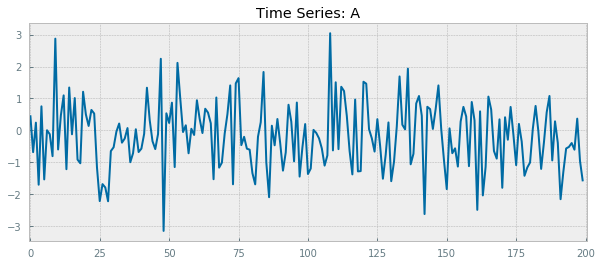

The series is likely stationary.


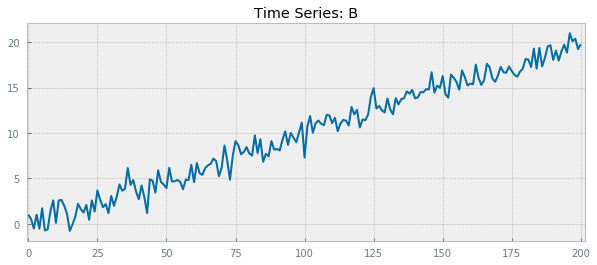

The series is likely non-stationary.


In [121]:
np.random.seed(12)

n_sample = 200

# Series A
mu = 0
sigma = 1
A = np.random.normal(mu, sigma, size=n_sample)

plot_ts(A, "A")
res = check_for_stationarity(A)


# Series B
B = np.array([1])
for i in range(n_sample):
    mu = i * 0.1
    sigma = 1
    B = np.append(B, np.random.normal(mu, sigma))

plot_ts(B, "B")
res = check_for_stationarity(B)

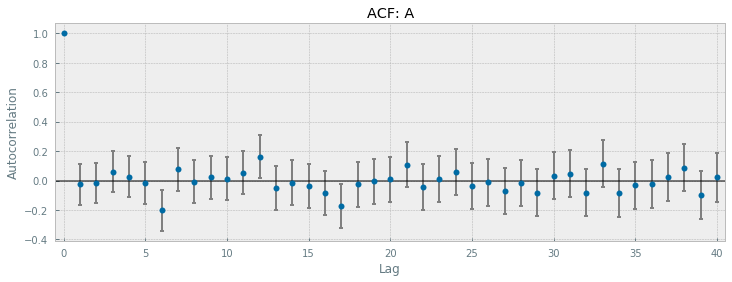

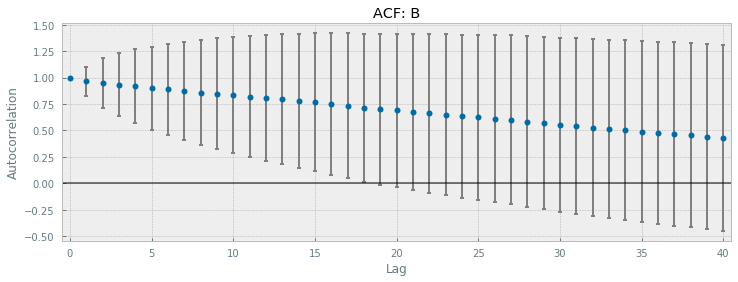

In [129]:
plot_acf(A, name="A")
plot_acf(B, name="B")